In [8]:
import qiskit
%matplotlib inline
qiskit.__qiskit_version__

{'qiskit-terra': '0.9.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-aqua': '0.6.0',
 'qiskit': '0.12.0',
 'qiskit-aer': '0.3.0',
 'qiskit-ibmq-provider': '0.3.2'}

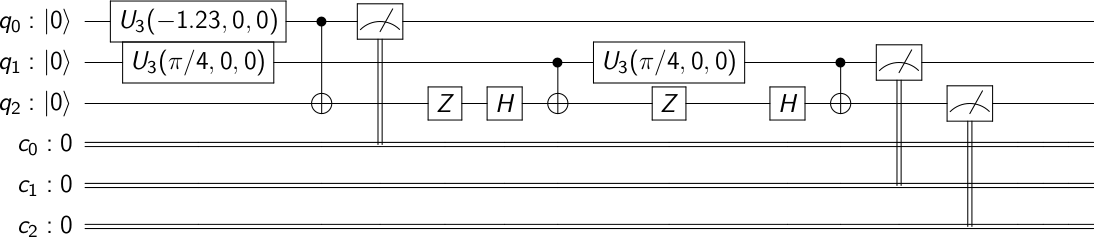

In [9]:
import math
len = 3
q_r = qiskit.QuantumRegister(len, 'q')
c_r = qiskit.ClassicalRegister(len, 'c')
q_c = qiskit.QuantumCircuit(q_r, c_r)

q_c.u3(-1.23096,0,0, q_r[0]);
q_c.u3(math.pi/4,0,0, q_r[1]);
q_c.cx(q_r[0],q_r[2]);
q_c.z(q_r[2]);
q_c.h(q_r[2]);
q_c.cx(q_r[1],q_r[2]);
q_c.z(q_r[2]);
q_c.u3(math.pi/4,0,0, q_r[1]);
q_c.h(q_r[2]);
q_c.cx(q_r[1],q_r[2]);


#q_c.barrier()
q_c.measure(q_r,c_r)
q_c.draw(output='latex', line_length=300, scale=0.5)   




{'001': 334, '100': 322, '010': 344}


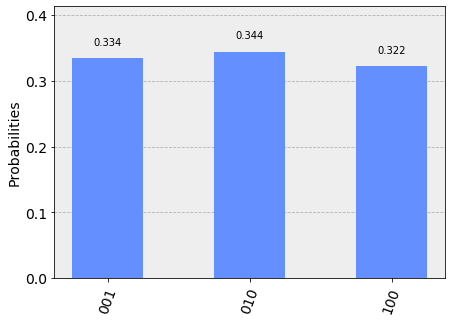

In [10]:
sim = qiskit.BasicAer.get_backend('qasm_simulator')
job = qiskit.execute(q_c, backend = sim, shots = 1000)
res = job.result().get_counts()
print(res)
qiskit.visualization.plot_histogram(res)

In [11]:
print(q_c.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg c[3];
u3(-1.23096000000000,0,0) q[0];
u3(0.785398163397448,0,0) q[1];
cx q[0],q[2];
z q[2];
h q[2];
cx q[1],q[2];
z q[2];
u3(0.785398163397448,0,0) q[1];
h q[2];
cx q[1],q[2];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];

